# EDA + Custom ANN experimentation(Classification) for the given custom dataset 
## Importing all necessary libraries

In [268]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.datasets import *
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import *
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Importing dataset

In [269]:
df=pd.read_excel("measures.xlsx")

## Data exploration and analysis

In [270]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,5,2.4,0.45,0.4,S1
1,7.4,2.5,0.4,0.5,S1
2,10.4,4.0,0.4,0.6,S1
3,5,3.8,0.4,0.7,S1
4,9.4,4.4,0.4,0.7,S1


In [271]:
df.isna()# trying to get null values

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
313,False,False,False,False,False
314,False,False,False,False,False
315,False,False,False,False,False
316,False,False,False,False,False


In [272]:
df.replace("NA",pd.NA)# its in the form of 'NA' in data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,5,2.4,0.45,0.4,S1
1,7.4,2.5,0.4,0.5,S1
2,10.4,4.0,0.4,0.6,S1
3,5,3.8,0.4,0.7,S1
4,9.4,4.4,0.4,0.7,S1
...,...,...,...,...,...
313,2.1,1.8,0.3,0.5,S5
314,0.4,1.6,0.3,0.4,S5
315,3.8,2.5,0.4,0.6,S5
316,2.5,2.3,0.4,0.4,S5


In [273]:
df.rename(columns={'Unnamed: 0': 'S1','Unnamed: 1': 'S2','Unnamed: 2': 'S3','Unnamed: 3': 'S4','Unnamed: 4': 'pred'}, inplace=True)

In [ ]:
# Labelling the columns appropriately

In [274]:
df.columns

Index(['S1', 'S2', 'S3', 'S4', 'pred'], dtype='object')

In [275]:
df.isna().sum() # shows no null values but thy ae of the form '-' and another character not on my keyboard 

S1      0
S2      0
S3      0
S4      0
pred    0
dtype: int64

In [276]:
#Replacing those with acual nan values
lst=["-","—"]
for j in df.columns:
    for i in df[j]:
       if i in lst:
           df[j].replace(i,np.nan,inplace=True)
  


C:\Users\ratis\AppData\Local\Temp\ipykernel_4820\2037206387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[j].replace(i,np.nan,inplace=True)
C:\Users\ratis\AppData\Local\Temp\ipykernel_4820\2037206387.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[j].replace(i,np.nan,inplace=True)


In [277]:
df.isnull().sum()# Now we see actuall null values

S1      10
S2       0
S3      37
S4      36
pred     0
dtype: int64

In [278]:
df.shape

(318, 5)

In [279]:
#Replacing null values with mean
for j in df.columns:
    if j=="pred":
        continue
    df[j].fillna(df[j].mean(), inplace=True)
    

C:\Users\ratis\AppData\Local\Temp\ipykernel_4820\1584234315.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[j].fillna(df[j].mean(), inplace=True)


In [280]:
df.isna().sum()# No more null values

S1      0
S2      0
S3      0
S4      0
pred    0
dtype: int64

In [281]:
df['pred'].unique()

array(['S1', 'S2', 'S3', 'S4', 'S5'], dtype=object)

In [282]:
# encoding target values to unique integers
le = LabelEncoder()
df['pred']=le.fit_transform(df['pred'])


In [283]:
df['pred'].unique()#encoded target classes

array([0, 1, 2, 3, 4])

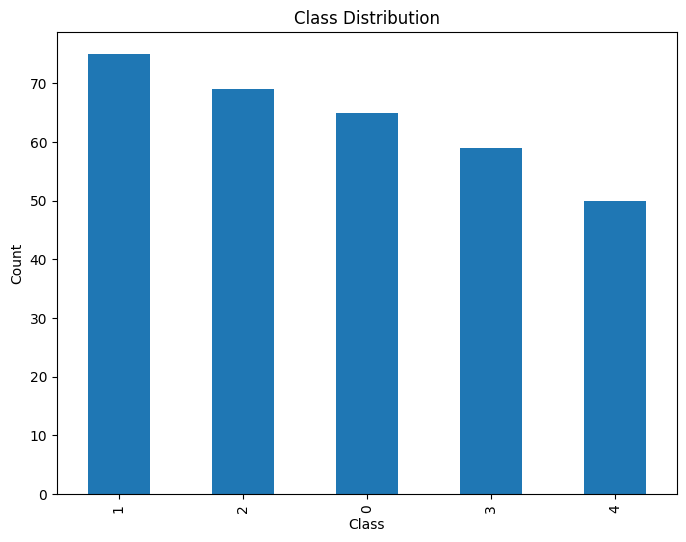

In [326]:
# Viewing data distribution of each class

class_counts = df['pred'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# unbalanced dataset

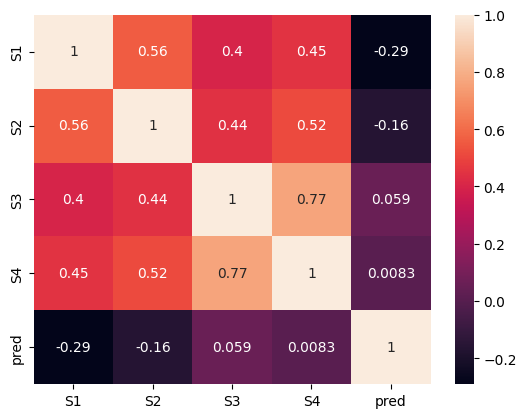

In [285]:
sns.heatmap(df.corr(), annot=True)
plt.show()
#no anomalies in correlation matrix

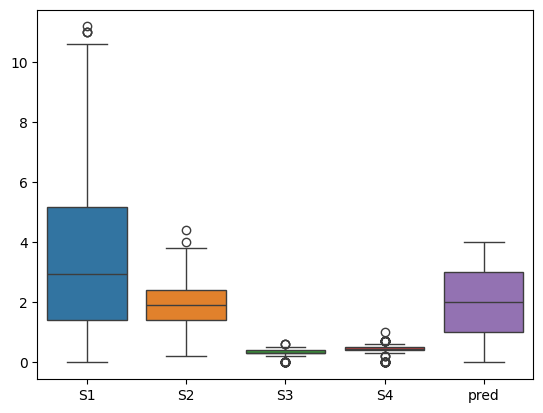

In [286]:
sns.boxplot(data=df)
plt.show()
# a few outliers

In [287]:
# deecting and replacing outliers with mean using z-score
for j in df.columns:
# Calculate IQR
    Q1 = df[j].quantile(0.25)
    Q3 = df[j].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    for i in df[j]:
       if i<lower_bound or i>upper_bound:
           df[j].replace(i,df[j].mean(),inplace=True)

C:\Users\ratis\AppData\Local\Temp\ipykernel_4820\681573053.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[j].replace(i,df[j].mean(),inplace=True)
C:\Users\ratis\AppData\Local\Temp\ipykernel_4820\681573053.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

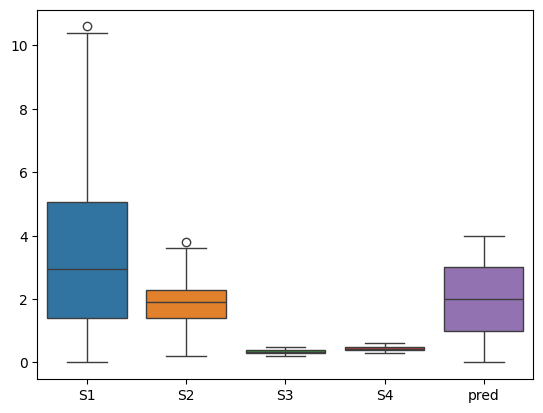

In [288]:
sns.boxplot(data=df)
plt.show()
#Reduced outliers

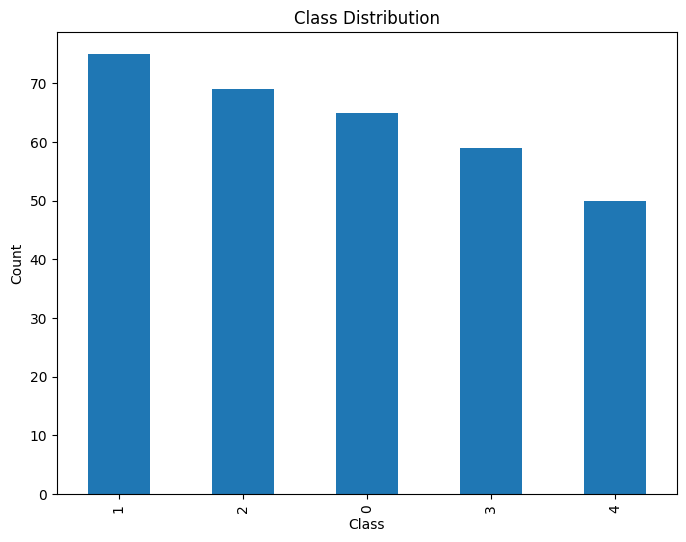

In [289]:
class_counts = df['pred'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
#trying to balance the dataset

In [290]:
print(class_counts)

pred
1    75
2    69
0    65
3    59
4    50
Name: count, dtype: int64


In [291]:
df['pred'].shape

(318,)

In [292]:
df.columns

Index(['S1', 'S2', 'S3', 'S4', 'pred'], dtype='object')

In [293]:
#Using ADASYN to generate syntetic sample to balance the dataset
from imblearn.over_sampling import ADASYN
from collections import Counter

# Counting the number of instances in each class before oversampling

y_train=df['pred']
X_train=df.drop('pred',axis=1)
# print(y_train)
# print(X_train)
counter = Counter(y_train)
print(X_train.shape)
print(y_train.shape)
print('Before', counter)

# Oversampling the train dataset using ADASYN
sampling_strategy = {0: 150, 1: 150, 2: 150, 3: 150, 4: 150}  # adjust the sampling strategy
ada = ADASYN(random_state=130, sampling_strategy=sampling_strategy, n_neighbors=10)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Counting the number of instances in each class after oversampling
counter = Counter(y_train_ada)
print('After', counter)

(318, 4)
(318,)
Before Counter({1: 75, 2: 69, 0: 65, 3: 59, 4: 50})
After Counter({3: 159, 0: 155, 4: 152, 1: 147, 2: 142})


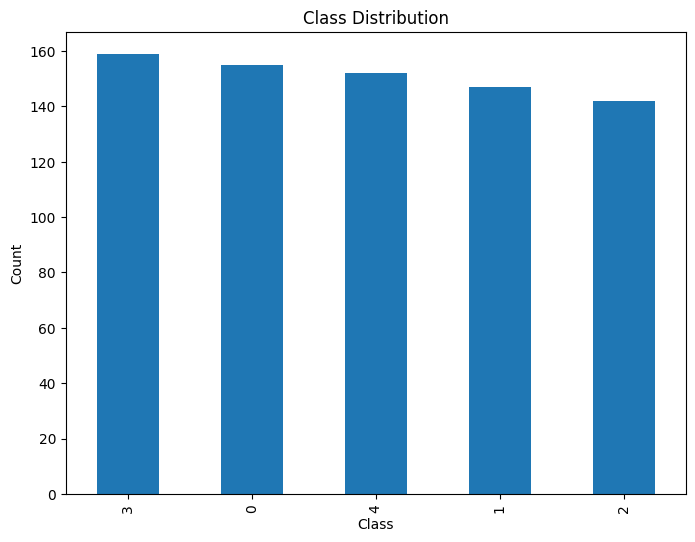

In [294]:
class_counts = y_train_ada.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# better balanced Dataset

## Model building and selecting

In [299]:

import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()
""" The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).
The first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.
The second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.
The output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). """

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                320       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,565
Trainable params: 2,565
Non-trainable params: 0
_________________________________________________________________


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

### The adam optimizer is used to update the model parameters during training. The SparseCategoricalCrossentropy loss function is used to measure the difference between the predicted probabilities and the true labels. The accuracy metric is used to evaluate the model's performance during training and testing.

In [301]:
x_train, x_test, y_train, y_test = train_test_split(X_train_ada, y_train_ada, test_size=0.2, random_state=42)

In [302]:
model.fit(x=x_train,y=y_train,epochs=500)

Epoch 1/500
19/19 [==============================] - 0s 1ms/step - loss: 1.6377 - accuracy: 0.1904
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5983 - accuracy: 0.2715
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5860 - accuracy: 0.2732
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5723 - accuracy: 0.2765
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5578 - accuracy: 0.3245
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5494 - accuracy: 0.2997
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5357 - accuracy: 0.3030
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5326 - accuracy: 0.3179
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 1.5239 - accuracy: 0.2964
Epoch 10/500
19/19 [==============================] - 0s 1ms/step - loss: 1.5142 - accuracy: 0.3079
Epoch 11/

In [ ]:
# another model

In [ ]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
#another model

In [303]:
model.fit(x=x_train,y=y_train,epochs=500,batch_size=32)

Epoch 1/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3659 - accuracy: 0.3709
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3598 - accuracy: 0.3891
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3680 - accuracy: 0.3642
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3634 - accuracy: 0.3858
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3635 - accuracy: 0.3642
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3585 - accuracy: 0.3775
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 1.3638 - accuracy: 0.3791
Epoch 8/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3632 - accuracy: 0.3858
Epoch 9/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3617 - accuracy: 0.3642
Epoch 10/500
19/19 [==============================] - 0s 1ms/step - loss: 1.3601 - accuracy: 0.3825
Epoch 11/

In [ ]:
#another model

In [308]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                320       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,565
Trainable params: 2,565
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

In [309]:
model.fit(x=x_train,y=y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 2.0137 - accuracy: 0.2219
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6330 - accuracy: 0.2483
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5978 - accuracy: 0.2831
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5924 - accuracy: 0.2765
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6516 - accuracy: 0.2616
Epoch 6/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5907 - accuracy: 0.2947
Epoch 7/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5930 - accuracy: 0.2682
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6094 - accuracy: 0.2848
Epoch 9/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6193 - accuracy: 0.2980
Epoch 10/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6234 - accuracy: 0.2666

In [ ]:
# another model

In [310]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               640       
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,221
Trainable params: 9,221
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

In [311]:
model.fit(x=x_train,y=y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 2.0620 - accuracy: 0.2500
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7274 - accuracy: 0.2666
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.6444 - accuracy: 0.2831
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6160 - accuracy: 0.2897
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6226 - accuracy: 0.2781
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.7251 - accuracy: 0.2699
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.6238 - accuracy: 0.2765
Epoch 8/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.7761 - accuracy: 0.2699
Epoch 9/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.8821 - accuracy: 0.2368
Epoch 10/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.6249 - accuracy: 0.2781

In [ ]:
#another one

In [312]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               640       
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9,221
Trainable params: 9,221
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

In [313]:
model.fit(x=x_train,y=y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 2.2549 - accuracy: 0.2169
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7255 - accuracy: 0.2086
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7854 - accuracy: 0.1705
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7748 - accuracy: 0.1871
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7517 - accuracy: 0.1871
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.7214 - accuracy: 0.2036
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.7504 - accuracy: 0.2202
Epoch 8/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.8420 - accuracy: 0.1887
Epoch 9/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.8511 - accuracy: 0.1921
Epoch 10/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.7242 - accuracy: 0.2268

In [ ]:
#another one

In [314]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                160       
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 5)                 85        
                                                                 
Total params: 773
Trainable params: 773
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

In [315]:
model.fit(x=x_train,y=y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.7385 - accuracy: 0.2285
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5688 - accuracy: 0.2964
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5465 - accuracy: 0.3262
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5099 - accuracy: 0.3096
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.5538 - accuracy: 0.2881
Epoch 6/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4951 - accuracy: 0.2897
Epoch 7/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5498 - accuracy: 0.3394
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5096 - accuracy: 0.3030
Epoch 9/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4845 - accuracy: 0.3245
Epoch 10/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4784 - accuracy: 0.3427

In [ ]:
#another one

In [316]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                320       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,565
Trainable params: 2,565
Non-trainable params: 0
_________________________________________________________________


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


' The input layer has 4 neurons, corresponding to the 4 input features (x1, x2, x3, x4).\nThe first hidden layer has 64 neurons with a ReLU (Rectified Linear Unit) activation function. This layer helps to learn complex relationships between the input features.\nThe second hidden layer has 32 neurons with a ReLU activation function. This layer helps to further refine the features learned in the previous layer.\nThe output layer has 5 neurons with a softmax activation function. This layer outputs a probability distribution over the 5 target labels (S1, S2, S3, S4, S5). '

In [317]:
model.fit(x=x_train,y=y_train,epochs=1000)

Epoch 1/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.6677 - accuracy: 0.2483
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5552 - accuracy: 0.2715
Epoch 3/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5655 - accuracy: 0.2632
Epoch 4/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.5125 - accuracy: 0.3113
Epoch 5/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4985 - accuracy: 0.2947
Epoch 6/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4809 - accuracy: 0.3129
Epoch 7/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4760 - accuracy: 0.2947
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 1.4821 - accuracy: 0.2930
Epoch 9/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.4685 - accuracy: 0.3195
Epoch 10/1000
19/19 [==============================] - 0s 2ms/step - loss: 1.4696 - accuracy: 0.3278

In [ ]:
#Another one -- best model

In [319]:
import tensorflow as tf

# Define the input shape
input_shape = (4,)  # 4 input features

# Define the number of classes
num_classes = 5  # 5 target labels (S1, S2, S3, S4, S5)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.05),
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

training=model.fit(x=x_train,y=y_train,epochs=1500)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                320       
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,565
Trainable params: 2,565
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500


E:\anaconda\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 0s 1ms/step - loss: 2.0914 - accuracy: 0.2368
Epoch 2/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.6135 - accuracy: 0.2699
Epoch 3/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.5677 - accuracy: 0.2831
Epoch 4/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.6169 - accuracy: 0.2682
Epoch 5/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.6244 - accuracy: 0.2583
Epoch 6/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.5816 - accuracy: 0.3063
Epoch 7/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.5442 - accuracy: 0.2930
Epoch 8/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.5400 - accuracy: 0.2930
Epoch 9/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.5692 - accuracy: 0.2682
Epoch 10/1500
19/19 [==============================] - 0s 1ms/step - loss: 1.6016 - accuracy: 0.2897
Epoch 11/150

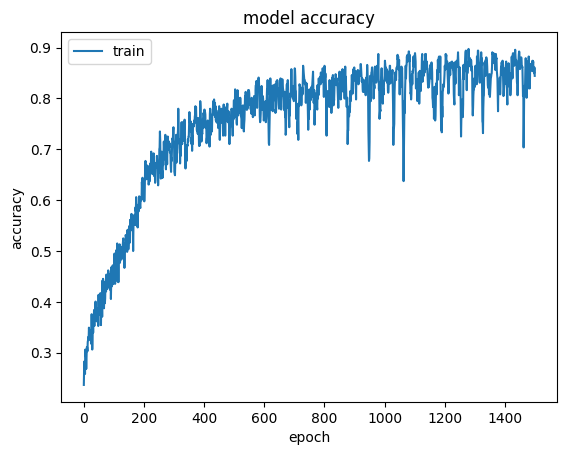

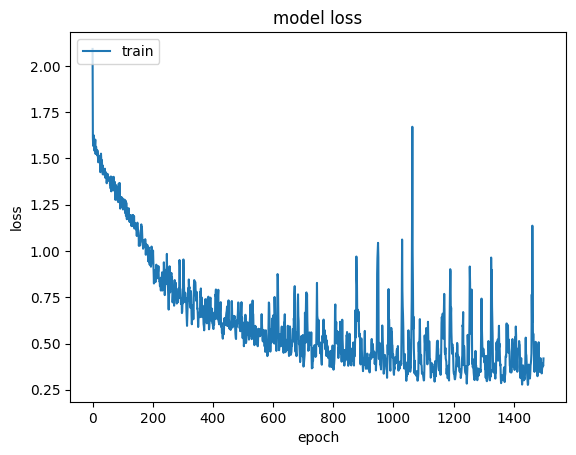

In [327]:
#accuracy loss visuals
def plotting(training):# summarize history for accuracy
    plt.plot(training.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(training.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plotting(training)

# final tabulation
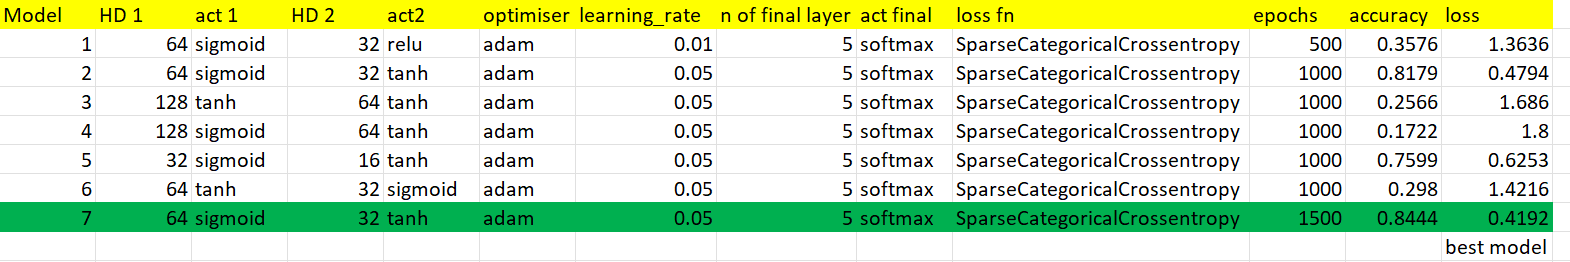